<a href="https://colab.research.google.com/github/ToKu404/DM/blob/master/kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"toku404","key":"c0c9773b8a09d8b32bc6efd248ac61cf"}'}

In [2]:
!ls

kaggle.json  sample_data


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 98% 223M/228M [00:06<00:00, 38.0MB/s]
100% 228M/228M [00:06<00:00, 36.8MB/s]


In [5]:
!unzip the-movies-dataset.zip

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [8]:
#load csv
df = pd.read_csv("movies_metadata.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
# Pilih yang akan digunakan
df = df[["budget", "revenue", "runtime", "vote_count", "vote_average", "title"]]

In [13]:
df.head()

,budget,revenue,runtime,vote_count,vote_average,title
0,30000000,373554033.0,81.0,5415.0,7.7,Toy Story
1,65000000,262797249.0,104.0,2413.0,6.9,Jumanji
2,0,0.0,101.0,92.0,6.5,Grumpier Old Men
3,16000000,81452156.0,127.0,34.0,6.1,Waiting to Exhale
4,0,76578911.0,106.0,173.0,5.7,Father of the Bride Part II


In [14]:
# cek yang kosong
df.isna().sum()

budget            0
revenue           6
runtime         263
vote_count        6
vote_average      6
title             6
dtype: int64

In [15]:
# Hapus yang kosong
# inplace agar indeksnya tidak berubah
df.dropna(inplace=True)

In [17]:
df.isna().sum()

budget          0
revenue         0
runtime         0
vote_count      0
vote_average    0
title           0
dtype: int64

In [18]:
# cek distribusi voting
df["vote_count"].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [20]:
# Kurangi votingnnya yang 75% keatas
df2 = df[df["vote_count"]>30]

In [22]:
# telah dilakukan reduksi data
len(df), len(df2)

(45203, 12178)

In [27]:
#Melakukan Scalling menjadi angka 0-1
minmax = preprocessing.MinMaxScaler().fit_transform(df2.drop("title",axis=1))

In [29]:
#jdi df numpy
minmax

array([[7.89473684e-02, 1.33988060e-01, 9.23603193e-02, 3.83366562e-01,
        8.10526316e-01],
       [1.71052632e-01, 9.42613127e-02, 1.18586089e-01, 1.69609798e-01,
        7.26315789e-01],
       [0.00000000e+00, 0.00000000e+00, 1.15165336e-01, 4.34349188e-03,
        6.84210526e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.46408210e-02, 4.27228710e-04,
        6.52631579e-01],
       [0.00000000e+00, 0.00000000e+00, 4.56100342e-03, 8.18855027e-03,
        8.73684211e-01],
       [0.00000000e+00, 0.00000000e+00, 1.15165336e-01, 8.11734549e-03,
        5.47368421e-01]])

In [33]:
#balikin ke df
df3 = pd.DataFrame(minmax, index=df2.index, columns=df2.columns[:-1])

In [35]:
df3

,budget,revenue,runtime,vote_count,vote_average
0,0.078947,0.133988,0.092360,0.383367,0.810526
1,0.171053,0.094261,0.118586,0.169610,0.726316
2,0.000000,0.000000,0.115165,0.004343,0.684211
3,0.042105,0.029216,0.144812,0.000214,0.642105
4,0.000000,0.027468,0.120867,0.010111,0.600000
...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053
45373,0.000000,0.000000,0.094641,0.000498,0.631579
45380,0.000000,0.000000,0.094641,0.000427,0.652632
45437,0.000000,0.000000,0.004561,0.008189,0.873684


In [38]:
# Menebak Berapa Cluster
# Bikin Skor, dan cek satu2
scr = []
for i in range(1, 20):
  score = KMeans(n_clusters=i).fit(df3).score(df3)
  print(score)
  scr.append(score)

-281.0031098516682
-198.5775883939566
-127.33958398552366
-106.07304224497129
-88.2611701788772
-78.80354314359471
-70.64238161578078
-63.38365041264807
-59.47509019553147
-55.598223886664705
-52.39470480379805
-49.79738571072579
-47.3153094116186
-45.122600529074425
-43.39591692096212
-41.72166154629153
-39.90253949613136
-38.64224054493509
-36.739143075111315


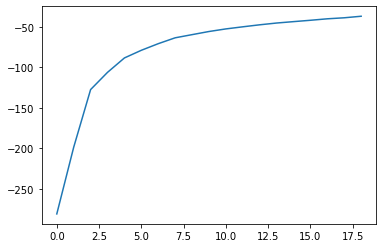

In [40]:
plt.plot(scr)
# akan diambil nilai yang di tekukan (jadi x (clusternya) antara 4 atau 5)

In [41]:
#Lakukan klasterisasi dengan 5 kluster
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
# Menanmbahkan cluster 
df3["cluster"] = kmeans.labels_

In [43]:
df3

,budget,revenue,runtime,vote_count,vote_average,cluster
0,0.078947,0.133988,0.092360,0.383367,0.810526,0
1,0.171053,0.094261,0.118586,0.169610,0.726316,4
2,0.000000,0.000000,0.115165,0.004343,0.684211,2
3,0.042105,0.029216,0.144812,0.000214,0.642105,2
4,0.000000,0.027468,0.120867,0.010111,0.600000,2
...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,2
45373,0.000000,0.000000,0.094641,0.000498,0.631579,2
45380,0.000000,0.000000,0.094641,0.000427,0.652632,2
45437,0.000000,0.000000,0.004561,0.008189,0.873684,1


(array([ 253.,    0., 3748.,    0.,    0., 4805.,    0., 2273.,    0.,
        1099.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

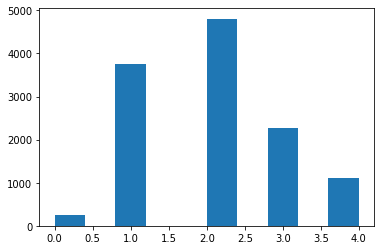

In [44]:
# Melihat histogram kluster
plt.hist(df3["cluster"])

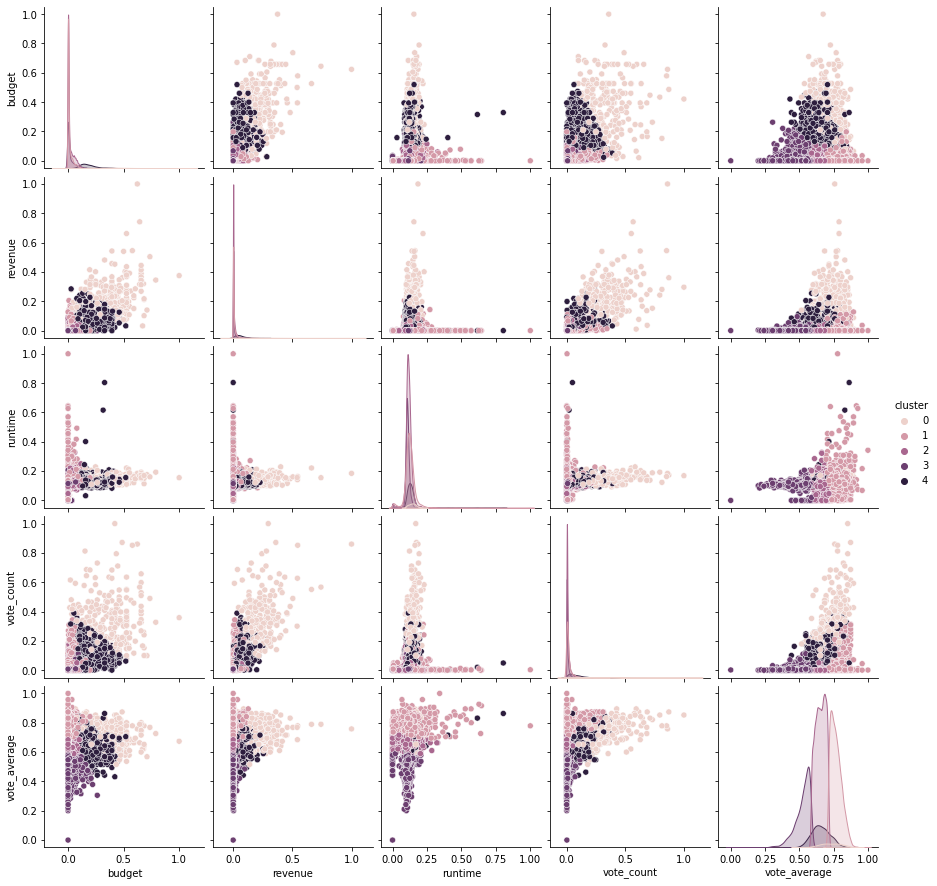

In [49]:
#analisa pairplot
sns.pairplot(df3, hue="cluster")

In [53]:
df3["title"] = df2["title"]
df3

,budget,revenue,runtime,vote_count,vote_average,cluster,title
0,0.078947,0.133988,0.092360,0.383367,0.810526,0,Toy Story
1,0.171053,0.094261,0.118586,0.169610,0.726316,4,Jumanji
2,0.000000,0.000000,0.115165,0.004343,0.684211,2,Grumpier Old Men
3,0.042105,0.029216,0.144812,0.000214,0.642105,2,Waiting to Exhale
4,0.000000,0.027468,0.120867,0.010111,0.600000,2,Father of the Bride Part II
...,...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,2,Frankenstein Created Woman
45373,0.000000,0.000000,0.094641,0.000498,0.631579,2,Take Me
45380,0.000000,0.000000,0.094641,0.000427,0.652632,2,The Incredible Jessica James
45437,0.000000,0.000000,0.004561,0.008189,0.873684,1,In a Heartbeat
